In [1]:
from astropy.table import Table

import matplotlib.pyplot as plt
%matplotlib notebook

import numpy as np

In [14]:
IMAGE_FORMAT = 'eps'
#IMAGE_DIR = 'C:/Users/jacob/Documents/GitHub/RotationCurves/images/'
IMAGE_DIR = '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/images/'

#master_table = Table.read( 'C:/Users/jacob/Documents/GitHub/RotationCurves/master_file.txt', format='ascii.ecsv')
#master_table = Table.read('/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/master_file_vflag.txt', 
#                          format='ascii.ecsv')
master_table = Table.read('../spirals/Pipe3D-master_file_vflag_BB_minimize_chi10_smooth2p27_mapFit_N2O2_HIdr2_noWords_v5.txt',
                          #'../spirals/Pipe3D-master_file_vflag_BB_minimize_chi10_smooth2p27_mapFit_N2O2_noWords.txt', 
                          format='ascii.commented_header')

In [3]:
plt.rc('font', size=16)
lwidth = 2 # Line width used in plots
msize = 3  # Marker size used in plots

## Distribution of chi-square

In [15]:
print(np.max(master_table['chi2_map']))

9902.351064987344


In [86]:
###########################################################################
# Hard-coded entry for the bins for the histrogram plots at the end of this
#    function.
#--------------------------------------------------------------------------
hist_range = ( 0, 1000)
BINS = np.arange( hist_range[0], hist_range[1], 5)
###########################################################################

<IPython.core.display.Javascript object>


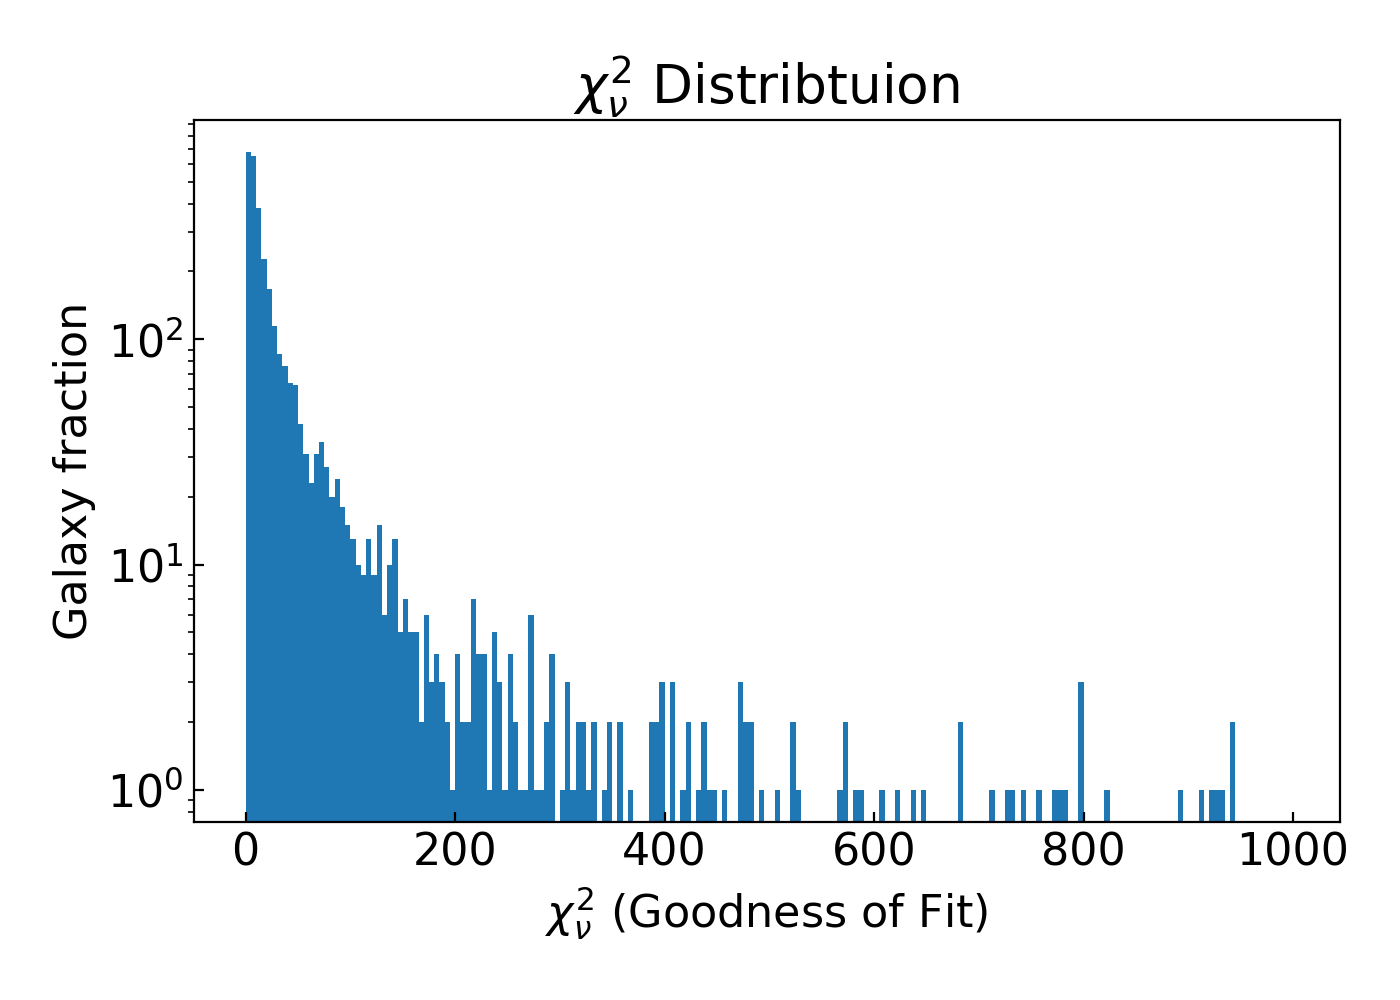

In [88]:
###########################################################################
# Plot the chi square distribution for the velocity maps.
#--------------------------------------------------------------------------
plt.figure(figsize=(7,5))
plt.title(r"$\chi^2_{\nu}$ Distribtuion")

plt.hist( master_table['chi2_map'], BINS, linewidth=lwidth)

plt.yscale('log')

plt.tick_params( axis='both', direction='in')
#ax.yaxis.set_ticks_position('both')
#ax.xaxis.set_ticks_position('both')
plt.ylabel('Galaxy fraction')
plt.xlabel(r'$\chi^2_{\nu}$ (Goodness of Fit)')

plt.tight_layout();
###########################################################################

## Relationship between $\chi^2_{\nu}$ and $M_{90}$

<IPython.core.display.Javascript object>


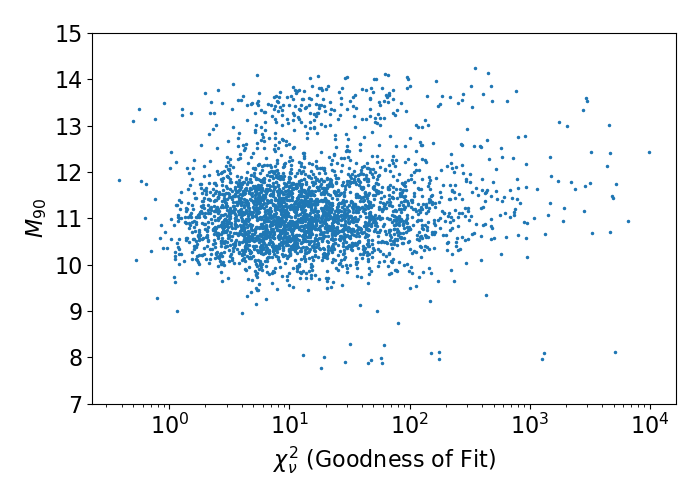

In [17]:
plt.figure( figsize=(7,5))

plt.semilogx( master_table['chi2_map'], master_table['M90_map'], '.', markersize=msize)

plt.xlabel(r'$\chi^2_{\nu}$ (Goodness of Fit)')
plt.ylabel('$M_{90}$')

plt.ylim([7,15])

plt.tight_layout();

## Relationship between $\chi^2_\nu$ and $\alpha$

<IPython.core.display.Javascript object>


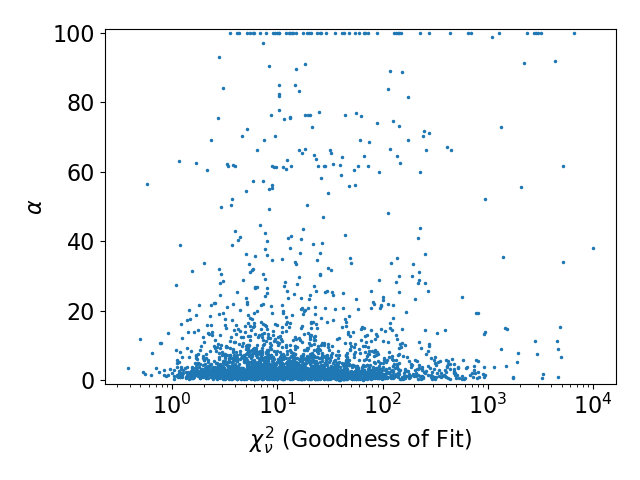

In [18]:
plt.figure()

plt.semilogx( master_table['chi2_map'], master_table['alpha_map'], '.', markersize=msize)

plt.xlabel(r'$\chi^2_{\nu}$ (Goodness of Fit)')
plt.ylabel(r'$\alpha$')

plt.ylim([-1,101])

plt.tight_layout();

## Relationship between $\chi^2_\nu$ and $b/a$

<IPython.core.display.Javascript object>


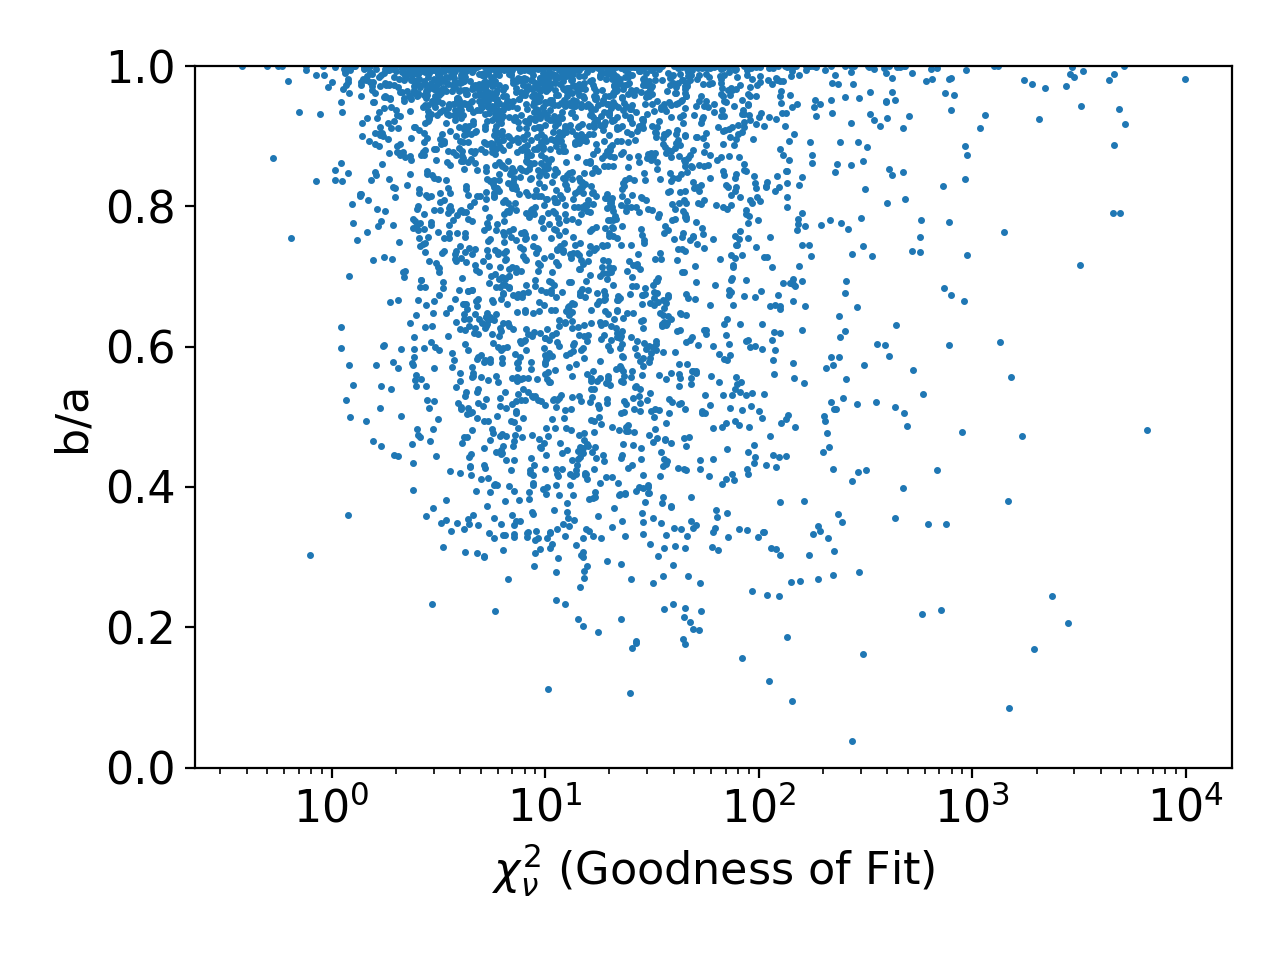

In [94]:
plt.figure()

plt.semilogx( master_table['chi2_map'], master_table['ba_map'], '.', markersize=msize)

plt.xlabel(r'$\chi^2_{\nu}$ (Goodness of Fit)')
plt.ylabel('b/a')

plt.ylim([0,1])

plt.tight_layout();

<IPython.core.display.Javascript object>


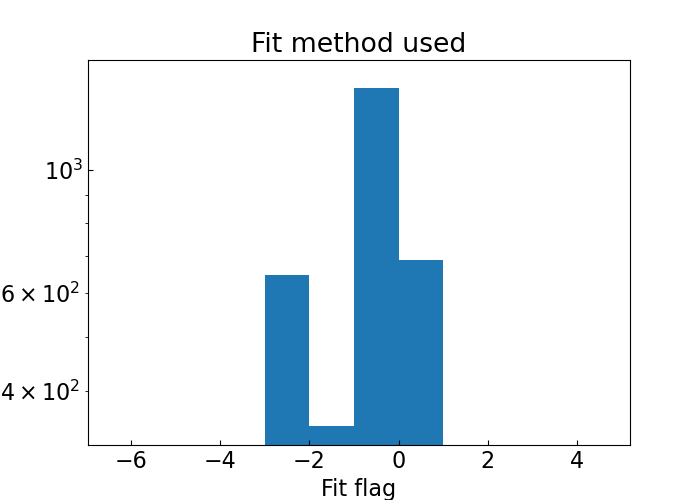

In [19]:
plt.figure(figsize=(7,5))
plt.title("Fit method used")

plt.hist( master_table['map_fit_flag'], bins=100)

plt.yscale('log')

plt.tick_params( axis='both', direction='in')
#ax.yaxis.set_ticks_position('both')
#ax.xaxis.set_ticks_position('both')
plt.ylabel('Galaxy fraction')
plt.xlabel('Fit flag');

In [20]:
good_fits = master_table['M90_map'] != -99

good_table = master_table[good_fits]

good_table.sort('alpha_map')

In [21]:
good_table.show_in_notebook()

In [83]:
idx = 3045

columns_to_show = ['MaNGA_plate', 
                   'MaNGA_IFU', 
                   #'DRP_map_smoothness',
                   'curve_used', 
                   'avg_chi_square_ndf', 
                   'pos_chi_square_ndf', 
                   'neg_chi_square_ndf', 
                   'chi2_map', 
                   'map_fit_flag', 
                   'alpha_map', 
                   'avg_alpha', 
                   'pos_alpha', 
                   'neg_alpha']
good_table[columns_to_show][idx]

<Row index=3045>
MaNGA_plate MaNGA_IFU curve_used avg_chi_square_ndf pos_chi_square_ndf neg_chi_square_ndf      chi2_map     map_fit_flag     alpha_map         avg_alpha          pos_alpha     neg_alpha
   int64      int64     int64         float64            float64            float64            float64        float64         float64           float64            float64       float64 
----------- --------- ---------- ------------------ ------------------ ------------------ ----------------- ------------ ----------------- ------------------ ----------------- ---------
       9868     12701        -99   19.3520402873422 13.032467810762997  313.4370792632806 43.01112017620534         -1.0 99.99993819778264 30.432285425815966 55.39054392156248    5e-324

In [43]:
np.sum(good_table['alpha_map'] > 99)

55

If we cut at $\chi^2_\nu$ given below, what is the final sample size?  (For comparison, the original paper contained 2426 objects.)

In [89]:
chi2_max = 40

np.sum(good_table['chi2_map'] < chi2_max)

2381

In [91]:
np.sum(good_table['M90_map'] > 13)

195

If we cut on b/a, what is the final sample size?

In [95]:
ba_max = 0.999

np.sum(good_table['ba_map'] < ba_max)

2885